In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import innvestigate.utils.visualizations as ivis
%matplotlib inline
np.random.seed(462019)

Using TensorFlow backend.


In [95]:
out_dir = 'figs' # TODO path to file

In [3]:
kept_idxs = [0, 2, 4, 5, 7, 9, 10, 11, 13, 15, 19, 20, 21, 22, 25, 27, 29, 30, 31, 34, 36, 39, 41, 42, 43, 44, 45, 47, 52, 53, 54, 56, 57, 58, 59, 61, 62, 66, 68, 71, 73, 74, 75, 76, 77, 79, 80, 84, 85, 86, 88, 89, 90, 91, 93, 94, 95, 98, 100, 101, 103, 104, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126, 127, 130, 132, 135, 137, 138, 139, 140, 141, 143, 147, 148, 149, 150, 153, 154, 155, 157, 158, 159, 162, 164, 167, 169, 170, 171, 172, 173, 175, 180, 181, 182, 184, 185, 186, 187, 189, 190, 191, 194, 196, 199, 201, 202, 204, 205, 207, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 223, 226, 228, 231, 233, 234, 235, 236, 237, 239, 243, 244, 245, 246, 249, 251, 253, 254, 255, 258, 260, 261, 263, 265, 266, 267, 268, 269, 271, 273, 275, 276, 277, 278, 280, 281, 282, 283, 285, 286, 287, 290, 292, 295, 297, 298, 300, 303, 308, 309, 310, 312, 313, 314, 315, 317, 318, 322, 324, 327, 329, 330, 331, 332, 333, 335, 340, 341, 342, 344, 345, 347, 349, 350, 354, 356, 357, 359, 361, 362, 363, 364, 365, 367, 370, 372, 373, 374, 376, 377, 378, 379, 381, 382, 383, 386, 388, 391, 393, 394, 395, 396, 397, 399, 404, 405, 406, 408, 409, 410, 413, 414, 415, 418, 420, 423, 425, 426, 428, 429, 431, 433, 436, 437, 438, 440, 441, 442, 443, 445, 446, 447, 450, 452, 455, 457, 458, 459, 460, 463, 468, 469, 470, 472, 473, 475, 477, 478, 479, 482, 484, 487, 489, 490, 492, 493, 495, 496, 499, 500, 501, 502, 504, 505, 506, 507, 509, 510, 512, 514, 516, 519, 520, 521, 522, 524, 525, 527, 529, 530, 531, 532, 533, 534, 536, 537, 538, 539, 541, 542, 544, 546, 548, 551, 553, 554, 555, 556, 557, 559, 564, 565, 566, 568, 569, 570, 571, 573, 574, 575, 577, 578, 580, 588, 589, 592, 593, 594, 596, 599, 600, 601, 604, 605, 607, 608, 609, 610, 612, 619, 620, 621, 625, 626, 628, 631, 632, 633, 636, 637, 639, 641, 642, 644, 651, 652, 653, 656, 657, 658, 660, 663, 664, 665, 669, 670, 671, 673, 676, 679, 683, 685, 688, 689, 695, 696, 697, 700, 701, 705, 706, 708, 711, 716, 717, 721, 722, 724, 727, 729, 732, 733, 734, 737, 738, 740, 741, 743, 748, 749, 753, 756, 759, 760, 765, 769, 772, 779, 780, 781, 785, 788, 791, 792, 793, 796, 797, 799, 801, 802, 804, 805, 807, 810, 811, 812, 813, 816, 817, 818, 820, 823, 824, 825, 828, 829, 832, 833, 836, 839, 842, 843, 844, 845, 849, 850, 852, 855, 856, 857, 860, 861, 862, 863, 865, 866, 868, 876, 877, 880, 884, 887, 888, 889, 892, 893, 894, 895, 897, 898, 900, 908, 909, 913, 914, 916, 919, 920, 921, 924, 925, 926, 927, 929, 939, 940, 941, 944, 945, 948, 951, 952, 957, 959, 961, 964, 971, 972, 973, 977, 980, 983, 988, 989, 990, 993, 996, 997, 999, 1003, 1004, 1005, 1008, 1009, 1010, 1012, 1015, 1016, 1017, 1018, 1020, 1021, 1022, 1025, 1026, 1027, 1028, 1031, 1035, 1036, 1037, 1040, 1041, 1042, 1044, 1047, 1048, 1052, 1053, 1054, 1057, 1060, 1066, 1067, 1068, 1069, 1072, 1074, 1079, 1080, 1081, 1082, 1084, 1085, 1086, 1087, 1089, 1092, 1093, 1099, 1100, 1101, 1104, 1106, 1108, 1111, 1113, 1116, 1117, 1121, 1122, 1124, 1133, 1137, 1138, 1140, 1143, 1145, 1148, 1149, 1154, 1182, 1214, 1246, 1250, 1276, 1278, 1282, 1310, 1314, 1346, 1406, 1410, 1438, 1442, 1470, 1502, 1534, 1538, 1564, 1566, 1570, 1598, 1602, 1630, 1634, 1662, 1666, 1694, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1741, 1742, 1743, 1744, 1745, 1748, 1749, 1750, 1752, 1753, 1758, 1759, 1761, 1762, 1763, 1764, 1766, 1767, 1768, 1771, 1773, 1774, 1775, 1777, 1781, 1782, 1783, 1784, 1786, 1789, 1790, 1791, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1812, 1814, 1816, 1817, 1818, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1835, 1837, 1839, 1840, 1841, 1844, 1846, 1847, 1849, 1850, 1852, 1853, 1855, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1868, 1869, 1870, 1871, 1873, 1876, 1880, 1881, 1882, 1885, 1887, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1899, 1901, 1902, 1903, 1905, 1907, 1908, 1910, 1911, 1914, 1917, 1918, 1919, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1944, 1946, 1950, 1951, 1953, 1954, 1955, 1956, 1958, 1959, 1960, 1963, 1965, 1966, 1967, 1969, 1973, 1981, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1990, 1992, 1993, 1995, 1997, 1999, 2000, 2001, 2004, 2006, 2009, 2010, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2028, 2029, 2030, 2031, 2032, 2033, 2036, 2037, 2038, 2039, 2041, 2042, 2045, 2046, 2047, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2061, 2062, 2063, 2065, 2068, 2069, 2070, 2073, 2074, 2077, 2079, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2100, 2102, 2104, 2106, 2109, 2111, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2125, 2126, 2127, 2129, 2132, 2134, 2138, 2140, 2141, 2143, 2145, 2146, 2147, 2150, 2152, 2154, 2155, 2156, 2157, 2159, 2160, 2161, 2164, 2165, 2174, 2175, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2186, 2187, 2188, 2189, 2190, 2191, 2193, 2196, 2197, 2198, 2200, 2205, 2206, 2207, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2228, 2231, 2233, 2237, 2239, 2241, 2242, 2243, 2244, 2246, 2247, 2248, 2253, 2254, 2255, 2256, 2257, 2260, 2261, 2262, 2263, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2285, 2286, 2287, 2289, 2291, 2292, 2293, 2295, 2297, 2298, 2301, 2302, 2303, 2305, 2306, 2307, 2309, 2310, 2311, 2312, 2314, 2318, 2319, 2320, 2321, 2322, 2324, 2325, 2327, 2328, 2330, 2331, 2332, 2334, 2335, 2337, 2338, 2339, 2340, 2342, 2343, 2344, 2346, 2349, 2351, 2354, 2357, 2358, 2359, 2360, 2362, 2363, 2364, 2366, 2367, 2369, 2370, 2373, 2374, 2375, 2376, 2378, 2383, 2384, 2385, 2386, 2391, 2392, 2393, 2394, 2395, 2396, 2401, 2402, 2405, 2406, 2407, 2408, 2410, 2413, 2414, 2415, 2416, 2422, 2425, 2426, 2427, 2428, 2430, 2433, 2434, 2438, 2439, 2440, 2442, 2447, 2448, 2450, 2452, 2454, 2456, 2457, 2458, 2459, 2460, 2462, 2463, 2465, 2466, 2467, 2469, 2470, 2471, 2472, 2474, 2477, 2479, 2480, 2484, 2489, 2490, 2491, 2492, 2496, 2497, 2499, 2501, 2502, 2503, 2504, 2506, 2507, 2509, 2511, 2513, 2520, 2521, 2522, 2523, 2524, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2538, 2540, 2543, 2544, 2545, 2546, 2549, 2550, 2552, 2553, 2554, 2555, 2556, 2558, 2561, 2563, 2565, 2566, 2567, 2568, 2570, 2573, 2574, 2575, 2576, 2577, 2578, 2580, 2582, 2583, 2584, 2585, 2586, 2588, 2590, 2591, 2593, 2594, 2595, 2596, 2598, 2599, 2600, 2602, 2603, 2605, 2607, 2612, 2613, 2614, 2615, 2616, 2618, 2620, 2625, 2626, 2627, 2628, 2630, 2631, 2632, 2633, 2634, 2636, 2637, 2641, 2642, 2645, 2646, 2649, 2650, 2651, 2652, 2654, 2657, 2658, 2659, 2661, 2662, 2663, 2664, 2666, 2668, 2671, 2672, 2673, 2678, 2679, 2682, 2683, 2684, 2686, 2691, 2692, 2693, 2694, 2695, 2696, 2698, 2701, 2702, 2705, 2708, 2710, 2713, 2714, 2715, 2718, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2735, 2736, 2737, 2738, 2740, 2741, 2742, 2744, 2746, 2747, 2748, 2753, 2754, 2755, 2756, 2758, 2759, 2760, 2762, 2765, 2767, 2768, 2769, 2770, 2773, 2774, 2775, 2778, 2779, 2781, 2785, 2786, 2787, 2789, 2790, 2791, 2792, 2794, 2797, 2799, 2800, 2802, 2804, 2806, 2809, 2810, 2811, 2812, 2814, 2815, 2817, 2818, 2821, 2822, 2823, 2824, 2826, 2830, 2831, 2832, 2833, 2834, 2836, 2837, 2838, 2841, 2842, 2843, 2844, 2846, 2847, 2849, 2850, 2851, 2853, 2854, 2855, 2856, 2858, 2861, 2863, 2865, 2866, 2869, 2870, 2874, 2875, 2876, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2953, 2954, 2956, 2957, 2958, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3009, 3010, 3011, 3013, 3014, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3074, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3163, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3190, 3191, 3192, 3193, 3194, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3253, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3317, 3318, 3320, 3321, 3322, 3323, 3324, 3325, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3398, 3399, 3400, 3401, 3403, 3404, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419]

In [4]:
kept_idxs = np.array(kept_idxs)
kept_idxs.shape

(1842,)

In [5]:
npz_file = 'data/bestf.npz' # TODO path to file

In [6]:
loaded = np.load(npz_file)
y, prob = loaded['y'], loaded['pred']

In [7]:
y.shape, prob.shape

((3420,), (3420, 2))

In [8]:
# Before
pred = np.argmax(prob, axis=1)
FP = np.nonzero(y<pred)[0]
FN = np.nonzero(y>pred)[0]
len(FP), len(FN)

(105, 61)

In [9]:
# Keep only those samples which have been successfully analyzed
y = y[kept_idxs]
prob = prob[kept_idxs]
y.shape, prob.shape

((1842,), (1842, 2))

In [10]:
# After
pred = np.argmax(prob, axis=1)
FP = np.nonzero(y<pred)[0]
FN = np.nonzero(y>pred)[0]
len(FP), len(FN)

(57, 20)

In [11]:
accuracy = np.mean(list(pred==y))
accuracy

0.9581976112920738

In [12]:
eps = 10e-12

In [13]:
# prob[prob[:,1]==0, 0]

In [14]:
# logs!

In [15]:
# np.any(prob>0)

In [16]:
confidence_for_0 = (prob[:,1]-eps)/(prob[:,0]-eps)
# confidence_for_1 = (prob[:,0]-eps)/(prob[:,1]-eps)

In [17]:
# confidence_for_0[100:200]

# Get the most confident correct and false classifications for each class

In [18]:
# Sort the index by ascending confidence for 0 (i.e. descending for 1)

In [19]:
idx_0 = np.argsort(confidence_for_0)
confidence_for_0[idx_0]

array([2.2839898e-13, 2.9130555e-13, 2.9130555e-13, ..., 6.1487265e+12,
       6.1487265e+12, 6.3756388e+12], dtype=float32)

In [20]:
# fps = np.nonzero(np.diff(y[idx_0]) < 0)[0] + 1 # the first indices in this array are confident false positives
# fns = np.nonzero(np.diff(y[idx_0]) > 0)[0] + 1  # the last indices in this array are confident false negatives

In [21]:
sorted_y = y[idx_0]
sorted_pred = pred[idx_0]

In [22]:
fps = np.nonzero(sorted_y<sorted_pred)[0] # the first indices in this array are confident false positives
fns = np.nonzero(sorted_y>sorted_pred)[0] #  # the last indices in this array are confident false negatives

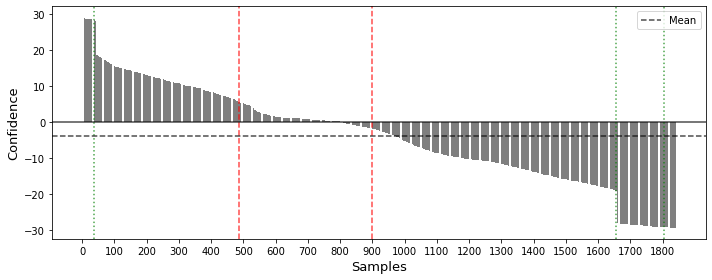

In [23]:
c = -np.log(confidence_for_0[idx_0])
n_frames = len(c)
# objects = np.arange(0,n_frames, 5)
y_pos = np.arange(n_frames)
performance = c

fig = plt.figure(figsize=(10,4))
barlist = plt.bar(y_pos, performance, alpha=0.5, color='black')
# for i in barlist:
#     if i in range(fps[0],fns[-1]):
#         barlist[i].set_color('r')
plt.axvline(fps[0], color="red", ls='--', alpha=0.7)
plt.axvline(fns[-1], color="red", ls='--', alpha=0.7)
plt.axvline(int(0.02*n_frames), color="green", ls=':', alpha=0.7)
plt.axvline(int(0.98*n_frames), color="green", ls=':', alpha=0.7)
plt.axvline(int(0.90*n_frames), color="green", ls=':', alpha=0.7)


# plt.xticks(y_pos, objects)
plt.xticks(np.arange(0,n_frames,100))


plt.ylabel('Confidence', fontsize=13)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Samples', fontsize=13)
# plt.title('Confidence per Sample')

plt.axhline(0, color="black", ls='-', alpha=0.7)

plt.axhline(np.mean(c), color="black", ls='--', alpha=0.7, label='Mean')

plt.legend()


plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'confidence.pdf'), bbox_inches='tight')
plt.show()

In [24]:
fps[0], fns[-1]

(488, 899)

In [25]:
y[idx_0][320:950]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
print("These indices point into the kept_idxs array:")
tp_idx = idx_0[0]
tn_idx = idx_0[-1]
fp_idx = idx_0[fps[0]]
fn_idx = idx_0[fns[-1]]
print("Most confident true positive: {}".format(tp_idx))
print("Most confident true negative: {}".format(tn_idx))
print("Most confident false positive: {}".format(fp_idx))
print("Most confident false negative: {}".format(fn_idx))


These indices point into the kept_idxs array:
Most confident true positive: 395
Most confident true negative: 622
Most confident false positive: 744
Most confident false negative: 260


In [27]:
print("These indices point into the original augmented small dataset of 3420 samples:")
tp = kept_idxs[tp_idx]
tn = kept_idxs[tn_idx]
fp = kept_idxs[fp_idx]
fn = kept_idxs[fn_idx]
print("Most confident true positive: {}".format(tp))
print("Most confident true negative: {}".format(tn))
print("Most confident false positive: {}".format(fp))
print("Most confident false negative: {}".format(fn))


These indices point into the original augmented small dataset of 3420 samples:
Most confident true positive: 676
Most confident true negative: 1470
Most confident false positive: 1891
Most confident false negative: 437


In [28]:
# Check correctness:
print("    y|pred")
print("tp: {}|{}".format(y[tp_idx], pred[tp_idx]))
print("tn: {}|{}".format(y[tn_idx], pred[tn_idx]))
print("fp: {}|{}".format(y[fp_idx], pred[fp_idx]))
print("fn: {}|{}".format(y[fn_idx], pred[fn_idx]))

    y|pred
tp: 1|1
tn: 0|0
fp: 0|1
fn: 1|0


In [29]:
# Choose random samples from true positives:
print("These indices point into the kept_idxs array:")
idx = np.random.randint(0,fps[0], size=5) # looks only at the most confident true positives
print("Example true positive: {}".format(idx_0[idx]))
print("These indices point into the original augmented small dataset of 3420 samples:")
print("Example true positive: {}".format(kept_idxs[idx_0[idx]]))

These indices point into the kept_idxs array:
Example true positive: [1376  450 1026 1814  692]
These indices point into the original augmented small dataset of 3420 samples:
Example true positive: [2913  810 2339 3389 1809]


In [30]:
# Check correctness:
print("tp: {}".format(y[idx_0[idx]]==pred[idx_0[idx]]))
y[idx_0[idx]]

tp: [ True  True  True  True  True]


array([1, 1, 1, 1, 1], dtype=int64)

In [31]:
# Choose random sample from true negatives:
print("These indices point into the kept_idxs array:")
idx = np.random.randint(fns[-1]+1, len(kept_idxs), size=5) # looks only at the most confident true negatives
print("Example true negative: {}".format(idx_0[idx]))
print("These indices point into the original augmented small dataset of 3420 samples:")
print("Example true negative: {}".format(kept_idxs[idx_0[idx]]))
print("We used 3122, 1031, 3030, which equal 1571, 554, 1483")

These indices point into the kept_idxs array:
Example true negative: [1758 1375 1698  187  856]
These indices point into the original augmented small dataset of 3420 samples:
Example true negative: [3330 2912 3263  310 2068]
We used 3122, 1031, 3030, which equal 1571, 554, 1483


In [32]:
# Check correctness:
print("tn: {}".format(y[idx_0[idx]]==pred[idx_0[idx]]))
y[idx_0[idx]]

tn: [ True  True  True  True  True]


array([0, 0, 0, 0, 0], dtype=int64)

# Second, third, and fourth most confident samples

In [33]:
two_percent = int(0.02*len(kept_idxs))+1
two_percent

37

In [34]:
tp_idx = idx_0[:two_percent]
tn_idx = idx_0[-two_percent:]
print("{} most confident true positives: {}".format(two_percent, tp_idx))
print("{} most confident true negatives: {}".format(two_percent, tn_idx))
len(tp_idx), len(tn_idx), y[tp_idx], y[tn_idx]

37 most confident true positives: [ 395  109  241  296  203   47  168   11  259 1516 1790 1406 1708 1573
 1544 1735 1461 1601 1682 1819 1377 1654 1627 1487 1348 1433 1762 1730
 1785 1309 1331  365 1253 1329 1229 1026 1047]
37 most confident true negatives: [1485 1706 1431 1459 1760 1733  678 1599  921  638 1625 1788  117 1817
 1680  724  743  864 1652  635  618 1396  963  620  609  267  623  627
  193  633  615  629  284   55  631  610  622]


(37,
 37,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [35]:
fp_idx = idx_0[fps[:two_percent]]
fn_idx = idx_0[fns[-two_percent:]]
print("{} most confident false positives: {}".format(two_percent, fp_idx))
print("{} most confident false negatives: {}".format(two_percent, fn_idx))

len(fp_idx), len(fn_idx), y[fp_idx], pred[fp_idx], y[fn_idx], pred[fn_idx]

37 most confident false positives: [ 744  785  922  612  844  821  865  983  887  659  801  639  725  912
  874 1048 1340 1036  626  852  808 1135  989  775 1196 1178 1310  704
  964 1233 1072  765 1144 1088 1281 1205 1186]
37 most confident false negatives: [1250 1080  169  242  278   12   92  223   48  149  129   72  110  204
  319   29  186  338  297  260]


(37,
 20,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [36]:
kept_idxs[fp_idx]

array([1891, 1955, 2179, 1276, 2051, 2019, 2083, 2275, 2115, 1763, 1987,
       1731, 1859, 2157, 2093, 2375, 2870, 2358, 1564, 2061, 1997, 2535,
       2285, 1933, 2631, 2599, 2823, 1827, 2243, 2695, 2422, 1923, 2550,
       2454, 2774, 2646, 2614])

In [37]:
ten_percent = int(0.1*len(kept_idxs))
tn_idx_10 = idx_0[-ten_percent:]
print("{} most confident true negatives: {}".format(ten_percent, tn_idx_10))
len(tn_idx_10), y[tn_idx_10]

184 most confident true negatives: [ 257   66  165  449  535  466 1032  396  424  409 1829 1527 1094 1304
  493  549   73  187 1183  224  320  243 1157 1293  339   30 1084  261
  298  111  279  205   93  150  130 1237 1010 1168 1206 1105 1057 1090
 1069 1159 1125  437 1300  701  500  515  600  385 1564 1673  604  636
  980  593 1424 1453 1645  471  441  416  390  358 1397 1700 1727  490
  540  526 1478 1368 1782 1535  476  505 1593 1508 1810  577 1369 1754
 1837 1619  403 1663  559 1536 1674 1771 1646 1690 1581 1553 1609 1496
 1385 1716 1786 1650 1457 1373  993  755  573  384  399 1285  856  693
  994  879  756  898  784  982  462  376  391  507  843  943  373  519
  800  764  576  595  703  905  357  389 1346 1404  418  492 1375 1542
  548  886  565  820 1571 1514  658 1485 1706 1431 1459 1760 1733  678
 1599  921  638 1625 1788  117 1817 1680  724  743  864 1652  635  618
 1396  963  620  609  267  623  627  193  633  615  629  284   55  631
  610  622]


(184, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

# Check random samples from TNs between the red and green lines

In [87]:
# red_line = fns[-1] # most confident false negative
# green_line = int(0.90*n_frames)
red_line = 803
green_line = n_frames

In [88]:
performance[804]

-0.06599395

In [89]:
red_line, green_line

(803, 1842)

In [90]:
# interval = [red_line+1:green_line]

In [91]:
rnd = np.random.randint(red_line+1, green_line, size=15)

In [92]:
print("These indices point into the kept_idxs array:")
print("Example true negatives: {}".format(np.array(idx_0[rnd])))
print("These indices point into the original augmented small dataset of 3420 samples:")
print("Example true negatives: {}".format(kept_idxs[idx_0[rnd]]))

These indices point into the kept_idxs array:
Example true negatives: [ 756  949  414 1450   76   52  902  133 1313 1833 1005   16 1525  153
 1683]
These indices point into the original augmented small dataset of 3420 samples:
Example true negatives: [1908 2216  724 2992  122   90 2141  218 2830 3411 2309   29 3074  253
 3245]


Window size: 104


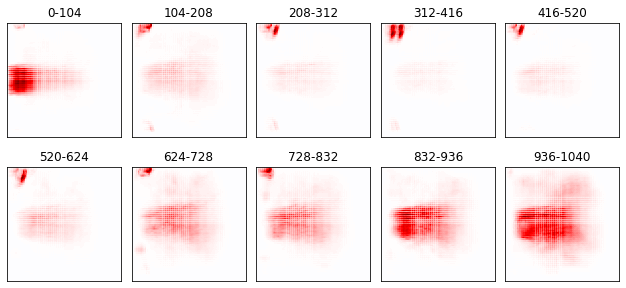

In [96]:
window = ((green_line-red_line-1)//10)+1
print("Window size: {}".format(window))
fig = plt.figure(figsize=(8.8,4.3))
for i, idx in enumerate(range(red_line+1, green_line, window)):
    plt.subplot(2,5,i+1)
    heat = np.mean(avg_over_frames[idx_0[idx:idx+window]], axis=0)
    h = get_imshow_heatmap(heat)
    plt.imshow(h, alpha=1)
    plt.tick_params(which='both',bottom=False,left=False,labelbottom=False, labelleft=False)
    idx -= 804
    plt.title("{}-{}".format(idx, idx+window), fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "agarose.pdf"), bbox_inches='tight')
plt.show()

# Averages of the 2% most confident samples

In [49]:
loaded = np.load('data/avgs.npz')
avg_over_samples, avg_over_frames, avg_over_positive_samples,avg_over_negative_samples = loaded['avg_over_samples'], loaded['avg_over_frames'], loaded['avg_over_positive_samples'],loaded['avg_over_negative_samples']
avg_over_samples_s, avg_over_frames_s, avg_over_positive_samples_s,avg_over_negative_samples_s = loaded['avg_over_samples_s'], loaded['avg_over_frames_s'], loaded['avg_over_positive_samples_s'],loaded['avg_over_negative_samples_s']

In [51]:
def get_imshow_heatmap(heat):
    h = np.tile(heat[np.newaxis, np.newaxis], (1, 3, 1, 1))
    h = h.swapaxes(1,2).swapaxes(2,3)
    h = ivis.heatmap(h)[0]
    return h

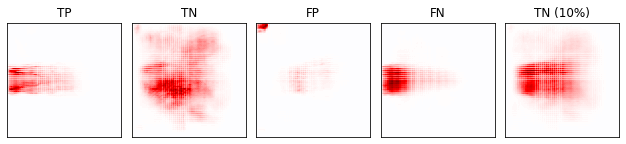

In [79]:
fig = plt.figure(figsize=(8.8,6))

############# TEMPORAL #############
plt.subplot(151)
heat = np.mean(avg_over_frames[tp_idx], axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.title('TP')

plt.subplot(152)
heat = np.mean(avg_over_frames[tn_idx], axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.title('TN')

plt.subplot(153)
heat = np.mean(avg_over_frames[fp_idx], axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.title('FP')

plt.subplot(154)
heat = np.mean(avg_over_frames[fn_idx], axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.title('FN')

plt.subplot(155)
heat = np.mean(avg_over_frames[tn_idx_10], axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.title('TN (10%)')



plt.tight_layout()
plt.savefig(os.path.join(out_dir, "two_percent.pdf"), bbox_inches='tight')
plt.show()